# Анализ метрик

На входе данные в формате csv:
- `ts`: время получения данных в формате unix timestamp в микросекундах
- `value`: значение метрики в формате float

На выходе:
- графики Plotly
- анализ данных
- статистика


In [16]:
# Загрузка данных
import pandas as pd
from pathlib import Path
pd.set_option('display.float_format', '{:.8f}'.format)
# Путь к файлу метрик
DATA_PATH = Path("data") / "metrics/t1.csv"

# Загрузка данных
# ts;value
# 1737558127500139;16.00000000
# 1737558127501114;653722.00000000
# 1737558128155640;18.00000000

data = pd.read_csv(DATA_PATH, delimiter=";")
data['value'] = data['value'].astype(int)

In [17]:
# Предобработка данных
# Преобразуем ts в формат datetime
data['ts'] = pd.to_datetime(data['ts'], unit='us')

# Сортируем данные по ts
data = data.sort_values(by='ts').reset_index(drop=True)

In [18]:
data

,ts,value
0,2025-01-24 09:57:47.741697,10
1,2025-01-24 09:57:47.742703,655587
2,2025-01-24 09:57:48.398392,16
3,2025-01-24 09:57:48.401145,16
4,2025-01-24 09:57:48.401178,12
...,...,...
77920644,2025-01-26 23:59:59.982223,20
77920645,2025-01-26 23:59:59.983435,13
77920646,2025-01-26 23:59:59.990568,17
77920647,2025-01-26 23:59:59.993821,32


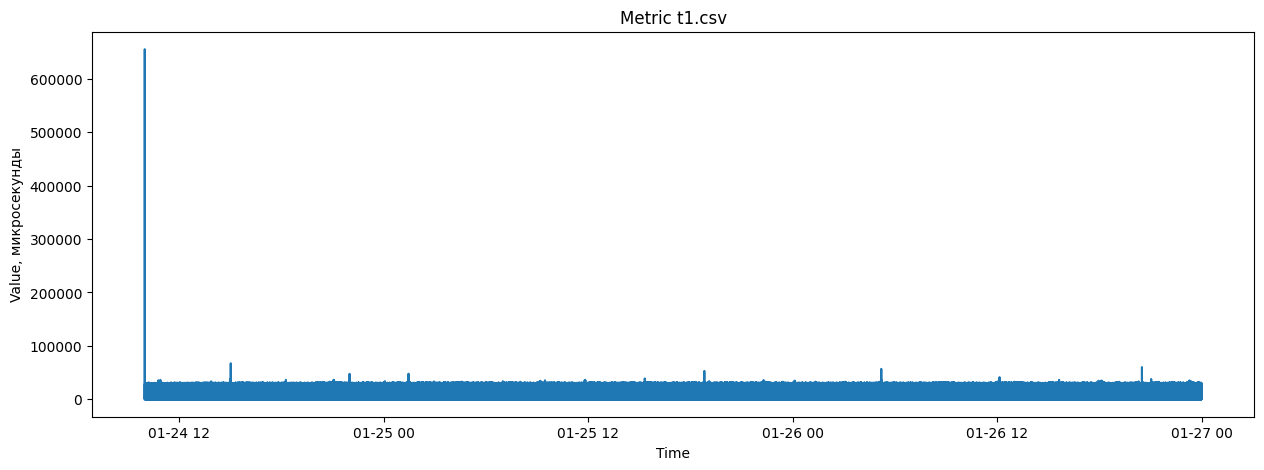

In [19]:
# Построим график используя Matplotlib, где на оси X будет время, а на оси Y - значение метрики

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(data['ts'], data['value'])
plt.xlabel(f'Time')
plt.ylabel('Value, микросекунды')
plt.title(f'Metric {DATA_PATH.name}')

plt.show()


In [20]:
# Отсортируем по значению метрики

In [21]:
# Верхние 10 значений метрики
data['value'].sort_values(ascending=False).head(10)

1           655587
6989110      67285
73040312     60180
55209620     56818
43180693     53025
21539338     47832
16902406     47628
63256784     41345
38624157     38896
6975542      38367
Name: value, dtype: int64

In [22]:
# Отобразим статистику по метрике

print("Сервер:", DATA_PATH.name)
print("Медиана:", data['value'].median())
print("Среднее:", data['value'].mean())
print("Максимум:", data['value'].max())
print("Минимум:", data['value'].min())
print("Стандартное отклонение:", data['value'].std())
print("Описательная статистика:")
data['value'].describe()

Сервер: t1.csv
Медиана: 21.0
Среднее: 26.735530655038563
Максимум: 655587
Минимум: 5
Стандартное отклонение: 309.40137374179506
Описательная статистика:


count   77920649.00000000
mean          26.73553066
std          309.40137374
min            5.00000000
25%           17.00000000
50%           21.00000000
75%           26.00000000
max       655587.00000000
Name: value, dtype: float64